# ロジスティックス回帰を使ったアヤメの品種分類

アヤメはおよそ60種類もの品種があり、そのおおよそは、がく片の長さ、がく片の幅、花弁の長さ、花弁の幅でその品種が決まると言われている。UCI（カリフォルニア大学アーバイン校）からデータマイニングの検証用データとして配布されている。以下ではそのデータの、がく片の長さと幅を使って品種を推論する。推論はロジスティックス回帰を用いる。

# アヤメのデータの読み込み

iris.csv を読み込み、データの相関を確認する。

In [1]:
import "github.com/mattn/go-plotlib"

display.Markdown(plotlib.MarkdownCSV("datasets/iris.csv"))

| SEPALLENGTH | SEPALWIDTH | PETALLENGTH | PETALWIDTH |      NAME       |
|-------------|------------|-------------|------------|-----------------|
|         5.1 |        3.5 |         1.4 |        0.2 | Iris-setosa     |
|         4.9 |        3.0 |         1.4 |        0.2 | Iris-setosa     |
|         4.7 |        3.2 |         1.3 |        0.2 | Iris-setosa     |
|         4.6 |        3.1 |         1.5 |        0.2 | Iris-setosa     |
|         5.0 |        3.6 |         1.4 |        0.2 | Iris-setosa     |
|         5.4 |        3.9 |         1.7 |        0.4 | Iris-setosa     |
|         4.6 |        3.4 |         1.4 |        0.3 | Iris-setosa     |
|         5.0 |        3.4 |         1.5 |        0.2 | Iris-setosa     |
|         4.4 |        2.9 |         1.4 |        0.2 | Iris-setosa     |
|         4.9 |        3.1 |         1.5 |        0.1 | Iris-setosa     |
|         5.4 |        3.7 |         1.5 |        0.2 | Iris-setosa     |
|         4.8 |        3.4 |         1.6 |        0.2 | Iris-setosa     |
|         4.8 |        3.0 |         1.4 |        0.1 | Iris-setosa     |
|         4.3 |        3.0 |         1.1 |        0.1 | Iris-setosa     |
|         5.8 |        4.0 |         1.2 |        0.2 | Iris-setosa     |
|         5.7 |        4.4 |         1.5 |        0.4 | Iris-setosa     |
|         5.4 |        3.9 |         1.3 |        0.4 | Iris-setosa     |
|         5.1 |        3.5 |         1.4 |        0.3 | Iris-setosa     |
|         5.7 |        3.8 |         1.7 |        0.3 | Iris-setosa     |
|         5.1 |        3.8 |         1.5 |        0.3 | Iris-setosa     |
|         5.4 |        3.4 |         1.7 |        0.2 | Iris-setosa     |
|         5.1 |        3.7 |         1.5 |        0.4 | Iris-setosa     |
|         4.6 |        3.6 |         1.0 |        0.2 | Iris-setosa     |
|         5.1 |        3.3 |         1.7 |        0.5 | Iris-setosa     |
|         4.8 |        3.4 |         1.9 |        0.2 | Iris-setosa     |
|         5.0 |        3.0 |         1.6 |        0.2 | Iris-setosa     |
|         5.0 |        3.4 |         1.6 |        0.4 | Iris-setosa     |
|         5.2 |        3.5 |         1.5 |        0.2 | Iris-setosa     |
|         5.2 |        3.4 |         1.4 |        0.2 | Iris-setosa     |
|         4.7 |        3.2 |         1.6 |        0.2 | Iris-setosa     |
|         4.8 |        3.1 |         1.6 |        0.2 | Iris-setosa     |
|         5.4 |        3.4 |         1.5 |        0.4 | Iris-setosa     |
|         5.2 |        4.1 |         1.5 |        0.1 | Iris-setosa     |
|         5.5 |        4.2 |         1.4 |        0.2 | Iris-setosa     |
|         4.9 |        3.1 |         1.5 |        0.1 | Iris-setosa     |
|         5.0 |        3.2 |         1.2 |        0.2 | Iris-setosa     |
|         5.5 |        3.5 |         1.3 |        0.2 | Iris-setosa     |
|         4.9 |        3.1 |         1.5 |        0.1 | Iris-setosa     |
|         4.4 |        3.0 |         1.3 |        0.2 | Iris-setosa     |
|         5.1 |        3.4 |         1.5 |        0.2 | Iris-setosa     |
|         5.0 |        3.5 |         1.3 |        0.3 | Iris-setosa     |
|         4.5 |        2.3 |         1.3 |        0.3 | Iris-setosa     |
|         4.4 |        3.2 |         1.3 |        0.2 | Iris-setosa     |
|         5.0 |        3.5 |         1.6 |        0.6 | Iris-setosa     |
|         5.1 |        3.8 |         1.9 |        0.4 | Iris-setosa     |
|         4.8 |        3.0 |         1.4 |        0.3 | Iris-setosa     |
|         5.1 |        3.8 |         1.6 |        0.2 | Iris-setosa     |
|         4.6 |        3.2 |         1.4 |        0.2 | Iris-setosa     |
|         5.3 |        3.7 |         1.5 |        0.2 | Iris-setosa     |
|         5.0 |        3.3 |         1.4 |        0.2 | Iris-setosa     |
|         7.0 |        3.2 |         4.7 |        1.4 | Iris-versicolor |
|         6.4 |        3.2 |         4.5 |        1.5 | Iris-versicolor |
|         6.9 |        3.1 |         4.9 |        1.5 | Iris-versicolor |
|         5.5 |        2.3 |         4.0 |        1.3 | Iris-versicolor |
|         6.5 |        2.8 |         4.6 |        1.5 | Iris-versicolor |
|         5.7 |        2.8 |         4.5 |        1.3 | Iris-versicolor |
|         6.3 |        3.3 |         4.7 |        1.6 | Iris-versicolor |
|         4.9 |        2.4 |         3.3 |        1.0 | Iris-versicolor |
|         6.6 |        2.9 |         4.6 |        1.3 | Iris-versicolor |
|         5.2 |        2.7 |         3.9 |        1.4 | Iris-versicolor |
|         5.0 |        2.0 |         3.5 |        1.0 | Iris-versicolor |
|         5.9 |        3.0 |         4.2 |        1.5 | Iris-versicolor |
|         6.0 |        2.2 |         4.0 |        1.0 | Iris-versicolor |
|         6.1 |        2.9 |         4.7 |        1.4 | Iris-versicolor |
|         5.6 |        2.9 |         3.6 |        1.3 | Iris-versicolor |
|         6.7 |        3.1 |         4.4 |        1.4 | Iris-versicolor |
|         5.6 |        3.0 |         4.5 |        1.5 | Iris-versicolor |
|         5.8 |        2.7 |         4.1 |        1.0 | Iris-versicolor |
|         6.2 |        2.2 |         4.5 |        1.5 | Iris-versicolor |
|         5.6 |        2.5 |         3.9 |        1.1 | Iris-versicolor |
|         5.9 |        3.2 |         4.8 |        1.8 | Iris-versicolor |
|         6.1 |        2.8 |         4.0 |        1.3 | Iris-versicolor |
|         6.3 |        2.5 |         4.9 |        1.5 | Iris-versicolor |
|         6.1 |        2.8 |         4.7 |        1.2 | Iris-versicolor |
|         6.4 |        2.9 |         4.3 |        1.3 | Iris-versicolor |
|         6.6 |        3.0 |         4.4 |        1.4 | Iris-versicolor |
|         6.8 |        2.8 |         4.8 |        1.4 | Iris-versicolor |
|         6.7 |        3.0 |         5.0 |        1.7 | Iris-versicolor |
|         6.0 |        2.9 |         4.5 |        1.5 | Iris-versicolor |
|         5.7 |        2.6 |         3.5 |        1.0 | Iris-versicolor |
|         5.5 |        2.4 |         3.8 |        1.1 | Iris-versicolor |
|         5.5 |        2.4 |         3.7 |        1.0 | Iris-versicolor |
|         5.8 |        2.7 |         3.9 |        1.2 | Iris-versicolor |
|         6.0 |        2.7 |         5.1 |        1.6 | Iris-versicolor |
|         5.4 |        3.0 |         4.5 |        1.5 | Iris-versicolor |
|         6.0 |        3.4 |         4.5 |        1.6 | Iris-versicolor |
|         6.7 |        3.1 |         4.7 |        1.5 | Iris-versicolor |
|         6.3 |        2.3 |         4.4 |        1.3 | Iris-versicolor |
|         5.6 |        3.0 |         4.1 |        1.3 | Iris-versicolor |
|         5.5 |        2.5 |         4.0 |        1.3 | Iris-versicolor |
|         5.5 |        2.6 |         4.4 |        1.2 | Iris-versicolor |
|         6.1 |        3.0 |         4.6 |        1.4 | Iris-versicolor |
|         5.8 |        2.6 |         4.0 |        1.2 | Iris-versicolor |
|         5.0 |        2.3 |         3.3 |        1.0 | Iris-versicolor |
|         5.6 |        2.7 |         4.2 |        1.3 | Iris-versicolor |
|         5.7 |        3.0 |         4.2 |        1.2 | Iris-versicolor |
|         5.7 |        2.9 |         4.2 |        1.3 | Iris-versicolor |
|         6.2 |        2.9 |         4.3 |        1.3 | Iris-versicolor |
|         5.1 |        2.5 |         3.0 |        1.1 | Iris-versicolor |
|         5.7 |        2.8 |         4.1 |        1.3 | Iris-versicolor |
|         6.3 |        3.3 |         6.0 |        2.5 | Iris-virginica  |
|         5.8 |        2.7 |         5.1 |        1.9 | Iris-virginica  |
|         7.1 |        3.0 |         5.9 |        2.1 | Iris-virginica  |
|         6.3 |        2.9 |         5.6 |        1.8 | Iris-virginica  |
|         6.5 |        3.0 |         5.8 |        2.2 | Iris-virginica  |
|         7.6 |        3.0 |         6.6 |        2.1 | Iris-virginica  |
|         4.9 |        2.5 |         4.5 |        1.7 | Iris-virginica  |
|         7.3 |        2.9 |         6.3 |        1.8 | Iris-virginica  |
|         6.7 |        2.5 |         5.8 |        1.8 | Iris-virginica  |
|         7.2 |        3.6 |         6.1 |        2.5 | Iris-virginica  |
|         6.5 |        3.2 |         5.1 |        2.0 | Iris-virginica  |
|         6.4 |        2.7 |         5.3 |        1.9 | Iris-virginica  |
|         6.8 |        3.0 |         5.5 |        2.1 | Iris-virginica  |
|         5.7 |        2.5 |         5.0 |        2.0 | Iris-virginica  |
|         5.8 |        2.8 |         5.1 |        2.4 | Iris-virginica  |
|         6.4 |        3.2 |         5.3 |        2.3 | Iris-virginica  |
|         6.5 |        3.0 |         5.5 |        1.8 | Iris-virginica  |
|         7.7 |        3.8 |         6.7 |        2.2 | Iris-virginica  |
|         7.7 |        2.6 |         6.9 |        2.3 | Iris-virginica  |
|         6.0 |        2.2 |         5.0 |        1.5 | Iris-virginica  |
|         6.9 |        3.2 |         5.7 |        2.3 | Iris-virginica  |
|         5.6 |        2.8 |         4.9 |        2.0 | Iris-virginica  |
|         7.7 |        2.8 |         6.7 |        2.0 | Iris-virginica  |
|         6.3 |        2.7 |         4.9 |        1.8 | Iris-virginica  |
|         6.7 |        3.3 |         5.7 |        2.1 | Iris-virginica  |
|         7.2 |        3.2 |         6.0 |        1.8 | Iris-virginica  |
|         6.2 |        2.8 |         4.8 |        1.8 | Iris-virginica  |
|         6.1 |        3.0 |         4.9 |        1.8 | Iris-virginica  |
|         6.4 |        2.8 |         5.6 |        2.1 | Iris-virginica  |
|         7.2 |        3.0 |         5.8 |        1.6 | Iris-virginica  |
|         7.4 |        2.8 |         6.1 |        1.9 | Iris-virginica  |
|         7.9 |        3.8 |         6.4 |        2.0 | Iris-virginica  |
|         6.4 |        2.8 |         5.6 |        2.2 | Iris-virginica  |
|         6.3 |        2.8 |         5.1 |        1.5 | Iris-virginica  |
|         6.1 |        2.6 |         5.6 |        1.4 | Iris-virginica  |
|         7.7 |        3.0 |         6.1 |        2.3 | Iris-virginica  |
|         6.3 |        3.4 |         5.6 |        2.4 | Iris-virginica  |
|         6.4 |        3.1 |         5.5 |        1.8 | Iris-virginica  |
|         6.0 |        3.0 |         4.8 |        1.8 | Iris-virginica  |
|         6.9 |        3.1 |         5.4 |        2.1 | Iris-virginica  |
|         6.7 |        3.1 |         5.6 |        2.4 | Iris-virginica  |
|         6.9 |        3.1 |         5.1 |        2.3 | Iris-virginica  |
|         5.8 |        2.7 |         5.1 |        1.9 | Iris-virginica  |
|         6.8 |        3.2 |         5.9 |        2.3 | Iris-virginica  |
|         6.7 |        3.3 |         5.7 |        2.5 | Iris-virginica  |
|         6.7 |        3.0 |         5.2 |        2.3 | Iris-virginica  |
|         6.3 |        2.5 |         5.0 |        1.9 | Iris-virginica  |
|         6.5 |        3.0 |         5.2 |        2.0 | Iris-virginica  |
|         6.2 |        3.4 |         5.4 |        2.3 | Iris-virginica  |
|         5.9 |        3.0 |         5.1 |        1.8 | Iris-virginica  |


まずは jupyter notebook でグラフを表示する為の準備を行う。

In [2]:
plotlib.DefaultFont("/etc/alternatives/fonts-japanese-gothic.ttf", "IPAGothic")

CSV ファイルの各カラムの相関を確認する。

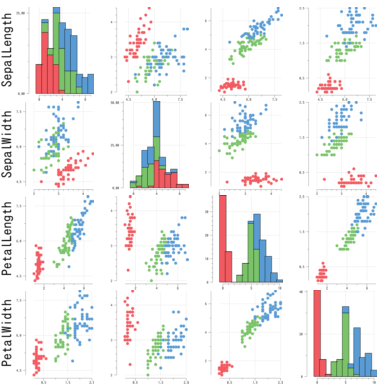

In [3]:
display.PNG(plotlib.PairPlotCSV("datasets/iris.csv"))

この図から確認するに、がく片の長さと幅と品種には相関があると言える。

# ロジスティックス回帰の実装

ロジスティックス回帰はランダムな初期値に対して勾配補正を行う手法。各データから得られる線形の勾配を都度補正していく。

In [4]:
import (
    "math"
    "math/rand"
    "time"
    
    "gonum.org/v1/gonum/mat"
)

func logisticRegression(X []*mat.VecDense, y *mat.VecDense, rate float64, ntrains int) *mat.VecDense {
    ws := make([]float64, X[0].Len())
    for i := range ws {
        ws[i] = rand.Float64()
    }
    w := mat.NewVecDense(len(ws), ws)
    for n := 0; n < ntrains; n++ {
        for i, x := range X {
            t := mat.NewVecDense(x.Len(), nil)
            t.CopyVec(x)
            pred := softmax(t, w)
            perr := y.AtVec(i) - pred
            scale := rate * perr * pred * (1 - pred)

            dx := mat.NewVecDense(x.Len(), nil)
            dx.CopyVec(x)
            dx.ScaleVec(scale, x)
            w.AddVec(w, dx)
        }
    }
    return w
}

func softmax(w, x *mat.VecDense) float64 {
    v := mat.Dot(w, x)
    return 1.0 / (1.0 + math.Exp(-v))
}

func predict(w, x *mat.VecDense) float64 {
    return softmax(w, x)
}

now := time.Now()
rand.Seed(now.UnixNano())

# CSV データの読み込み

iris.csv を読み込み、各値とラベルのセットを返す関数を実装する。

In [5]:
import (
    "os"
    "log"
    "bufio"
    "fmt"
)

func loadData(filename string) ([][]float64, []string, error) {
    f, err := os.Open(filename)
    if err != nil {
        log.Fatal(err)
    }
    defer f.Close()

    var resultV [][]float64
    var resultS []string

    scanner := bufio.NewScanner(f)
    // skip header
    scanner.Scan()
    for scanner.Scan() {
        var f1, f2, f3, f4 float64
        var s string
        n, err := fmt.Sscanf(scanner.Text(), "%f,%f,%f,%f,%s", &f1, &f2, &f3, &f4, &s)
        if n != 5 || err != nil {
            continue
        }
        resultV = append(resultV, []float64{f1, f2})
        resultS = append(resultS, s)
    }

    if err = scanner.Err(); err != nil {
        return nil, nil, err
    }
    return resultV, resultS, nil
}

In [6]:
xx, yy, err := loadData("datasets/iris.csv")
if err != nil {
    log.Fatal(err)
}

In [7]:
xx[:3]

[[5.1 3.5] [4.9 3] [4.7 3.2]]

In [8]:
yy[:3]

[Iris-setosa Iris-setosa Iris-setosa]

# ラベルの数値化

名前を数値化する為の関数を実装する。

In [9]:
func vocab(nn []string) map[string]int {
    m := make(map[string]int)
    for _, n := range nn {
        if _, ok := m[n]; !ok {
            m[n] = len(m)
        }
    }
    return m
}

func onehot(aa []string, nn map[string]int) *mat.VecDense {
    v := mat.NewVecDense(len(aa), nil)
    for i := 0; i < len(aa); i++ {
        f, ok := nn[aa[i]]
        if ok {
            v.SetVec(i, float64(f))
        }
    }
    v.ScaleVec(1/float64(len(nn)), v)
    return v
}

gonum を使って高速に処理を行う為にベクトルに変換する。ラベル一覧から単語のベクトル(Bag of Words)を作る。単語リストを作成し、その単語にマッチするインデックスで数値化する。

In [10]:
X := make([]*mat.VecDense, len(xx))           
for i := 0; i < len(X); i++ {                 
    X[i] = mat.NewVecDense(len(xx[i]), xx[i]) 
}
ns := vocab(yy)
y := onehot(yy, ns)

In [11]:
[]float64{y.AtVec(0), y.AtVec(1), y.AtVec(2)}

[0 0 0]

In [12]:
[]float64{y.AtVec(60), y.AtVec(61), y.AtVec(62)}

[0.3333333333333333 0.3333333333333333 0.3333333333333333]

In [13]:
[]float64{y.AtVec(y.Len()-3), y.AtVec(y.Len()-2), y.AtVec(y.Len()-1)}

[0.6666666666666666 0.6666666666666666 0.6666666666666666]

オリジナルデータを表示する。

In [14]:
import (
    "bytes"
    
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/plotutil"
    "gonum.org/v1/plot/vg"
    "gonum.org/v1/plot/vg/draw"
)

func plotData(x []*mat.VecDense, a *mat.VecDense, ns map[string]int) []byte {
    p, err := plot.New()
    if err != nil {
        log.Fatal(err)
    }

    p.Title.Text = "アヤメのがく片 長さと高さの関係"
    p.X.Label.Text = "がく片の長さ"
    p.Y.Label.Text = "がく片の幅"
    p.Add(plotter.NewGrid())

    for k, v := range ns {
        data0 := make(plotter.XYs, 0, len(x))
        for j := 0; j < len(x); j++ {
            av := int(float64(len(ns))*a.AtVec(j) + 0.1)
            if av != v {
                continue
            }
            data0 = append(data0, plotter.XY{X: x[j].AtVec(0), Y: x[j].AtVec(1)})
        }
        data, err := plotter.NewScatter(data0)
        if err != nil {
            log.Fatal(err)
        }
        data.GlyphStyle.Color = plotutil.Color(v)
        data.Shape = &draw.PyramidGlyph{}
        p.Add(data)
        p.Legend.Add(k, data)
    }

    w, err := p.WriterTo(4*vg.Inch, 4*vg.Inch, "png")
    if err != nil{
        panic(err)
    }
    var b bytes.Buffer
    writer := bufio.NewWriter(&b)
    w.WriteTo(writer)
    return b.Bytes()
}

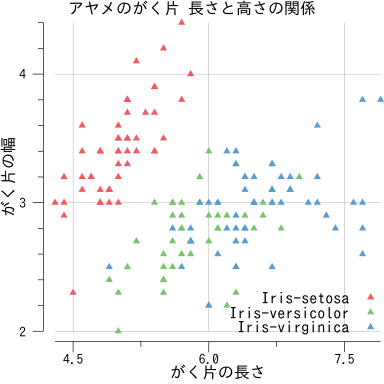

In [15]:
display.PNG(plotData(X, y, ns))

# 学習

ロジスティック回帰を使って学習する。w が補正されたベクトル。

In [16]:
w := logisticRegression(X, y, 0.0051, 500)
a := mat.NewVecDense(len(X), nil)
for i := 0; i < len(X); i++ {     
    a.SetVec(i, predict(w, X[i])) 
}

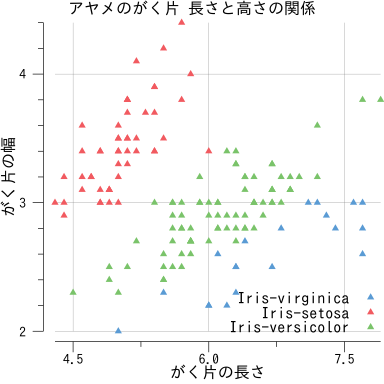

In [17]:
display.PNG(plotData(X, a, ns))

# 正解率の算出

正解率を算出する。

In [18]:
correct := 0
for i := 0; i < y.Len(); i++ {
    v1 := int(float64(len(ns))*a.AtVec(i) + 0.1)
    v2 := int(float64(len(ns))*y.AtVec(i) + 0.1)
    if v1 == v2 {
        correct++
    }
}
fmt.Printf("%f\n", float64(correct)/float64(y.Len()))

0.693333


9 <nil>

2クラスの線形モデルなのでそれほど良い結果ではない。

# 全カラムを使った学習

2カラムでは線形になってしまう為、誤差が発生しやすい。そこで全てのフィールドを使い非線形な学習を行う。

In [19]:
func loadDataAll(filename string) ([][]float64, []string, error) {
    f, err := os.Open(filename)
    if err != nil {
        log.Fatal(err)
    }
    defer f.Close()

    var resultV [][]float64
    var resultS []string

    scanner := bufio.NewScanner(f)
    // skip header
    scanner.Scan()
    for scanner.Scan() {
        var f1, f2, f3, f4 float64
        var s string
        n, err := fmt.Sscanf(scanner.Text(), "%f,%f,%f,%f,%s", &f1, &f2, &f3, &f4, &s)
        if n != 5 || err != nil {
            continue
        }
        resultV = append(resultV, []float64{f1, f2, f3, f4})
        resultS = append(resultS, s)
    }

    if err = scanner.Err(); err != nil {
        return nil, nil, err
    }
    return resultV, resultS, nil
}

In [20]:
xx, yy, err = loadDataAll("datasets/iris.csv")
if err != nil {
    log.Fatal(err)
}

In [21]:
X := make([]*mat.VecDense, len(xx))
for i := 0; i < len(X); i++ {
    X[i] = mat.NewVecDense(len(xx[i]), xx[i])
}
ns := vocab(yy)
y := onehot(yy, ns)

In [22]:
w := logisticRegression(X, y, 0.1, 300)
a := mat.NewVecDense(len(X), nil)
for i := 0; i < len(X); i++ {     
    a.SetVec(i, predict(w, X[i])) 
}

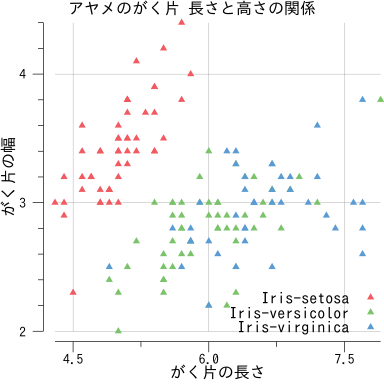

In [23]:
display.PNG(plotData(X, a, ns))

In [24]:
correct := 0
for i := 0; i < y.Len(); i++ {
    v1 := int(float64(len(ns))*a.AtVec(i) + 0.1)
    v2 := int(float64(len(ns))*y.AtVec(i) + 0.1)
    if v1 == v2 {
        correct++
    }
}
fmt.Printf("%f\n", float64(correct)/float64(y.Len()))

0.933333


9 <nil>

4項目を使ったクラス判定だと 93% の正解率だった。